In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
#Read the data
seed_data_4s = os.path.join(os.getcwd(), 'all_lemon_4s.h5')
deap_data_4s = os.path.join(os.getcwd(), 'deap_stress_1s_b.h5')
uva_data = os.path.join(os.getcwd(), 'UVA-DATASET/archive/GIB-UVA ERP-BCI.hdf5')
tuh_data = os.path.join(os.getcwd(), 'tuh_signals_4s.h5')


In [3]:
# Read the seed data
hf = h5py.File(seed_data_4s, 'r')
seed_eegs = np.array(hf.get('data'))
seed_labels = np.array(hf.get('labels'))
hf.close()

# Read the deap data
hf = h5py.File(deap_data_4s, 'r')
deap_eegs = np.array(hf.get('signals'))
deap_labels = np.array(hf.get('labels'))
hf.close()

# Read the Uva data
hf = h5py.File(uva_data, 'r')
uva_eegs = np.array(hf.get('features'))
hf.close()

# Read the TUH data
hf = h5py.File(tuh_data, 'r')
tuh_eegs = np.array(hf.get('data'))
tuh_labels = np.array(hf.get('labels'))
hf.close()

In [4]:
tuh_eegs.shape

(74051, 4096)

In [5]:
deap_eegs.shape

(16200, 8, 128)

In [6]:
seed_eegs.shape

(8, 41229, 512)

In [7]:
uva_eegs.shape

(701615, 128, 8)

In [8]:
seed_labels.shape
# Count unique labels
unique, counts = np.unique(seed_labels, return_counts=True)
print(dict(zip(unique, counts)))

{None: 1}


Text(0.5, 1.0, 'Seed EEG data')

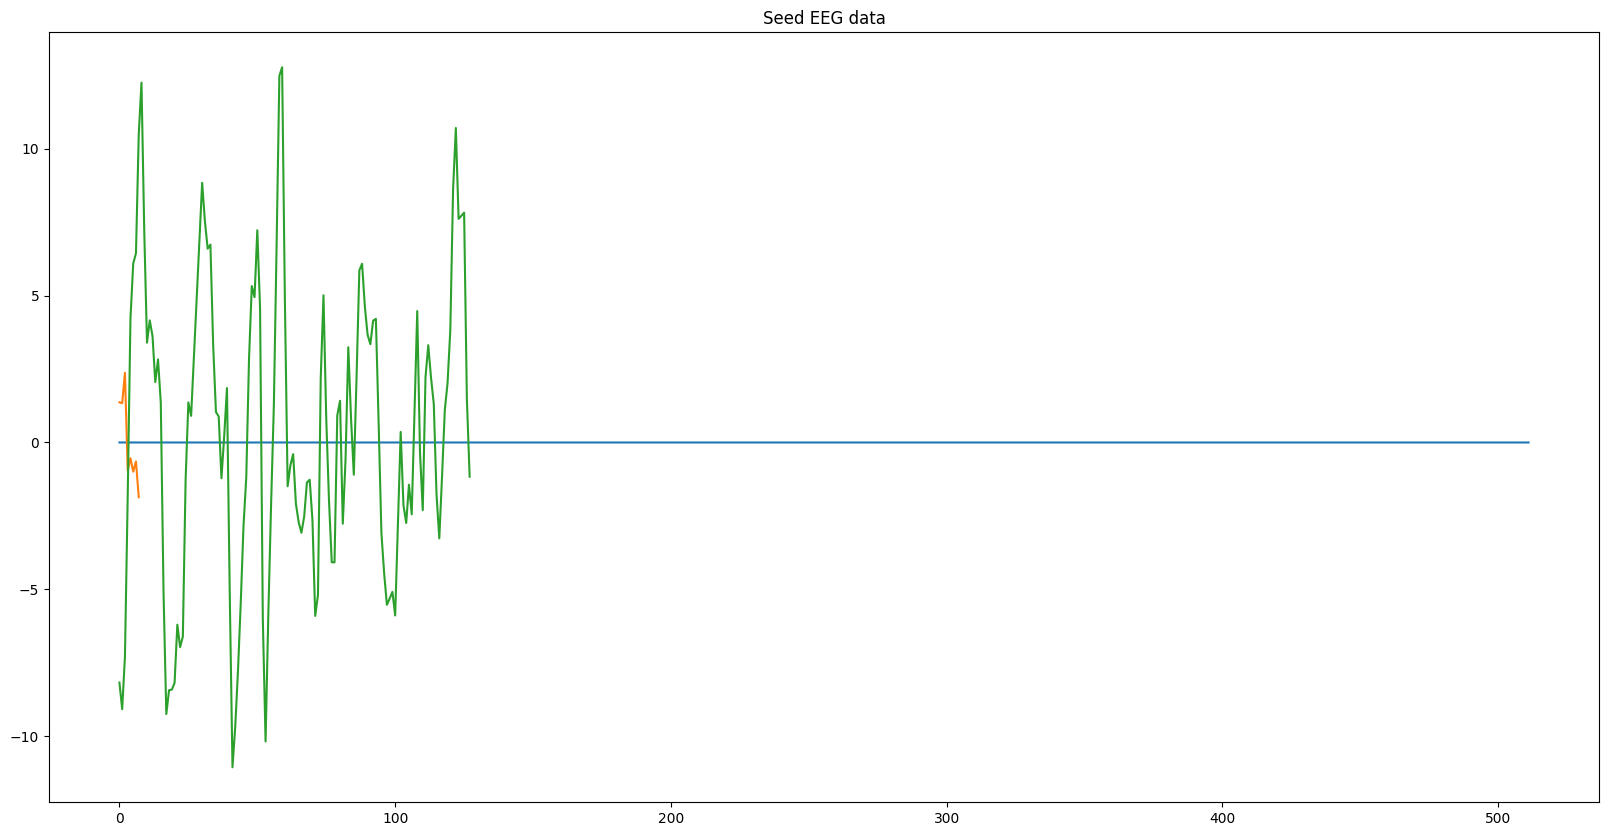

In [9]:
# Plot the data without normalization
plt.figure(figsize=(20, 10))
plt.plot(seed_eegs[0, 0, :])
plt.plot(uva_eegs[0, 7, :])
plt.plot(deap_eegs[0, 7, :128])
plt.title('Seed EEG data')

In [10]:
# Apply min max normalization
def min_max_normalization(data):
    # Normalize the data per channel
    for i in range(data.shape[1]):
        data[:,i] = (data[:,i] - np.min(data[:,i])) / (np.max(data[:,i]) - np.min(data[:,i]))
    return data

# seed_eegs = min_max_normalization(seed_eegs)
# deap_eegs = min_max_normalization(deap_eegs)
# uva_eegs = min_max_normalization(uva_eegs)


In [11]:
# # Apply z-score normalization
# def z_score_normalization(data):
#     # Normalize the data per channel
#     for i in range(data.shape[1]):
#         data[:,i] = (data[:,i] - np.mean(data[:,i])) / np.std(data[:,i])
#     return (data - np.mean(data)) / np.std(data)

In [12]:
# seed_eegs_z = z_score_normalization(seed_eegs)
# deap_eegs_z = z_score_normalization(deap_eegs)
# uva_eegs_z = z_score_normalization(uva_eegs)

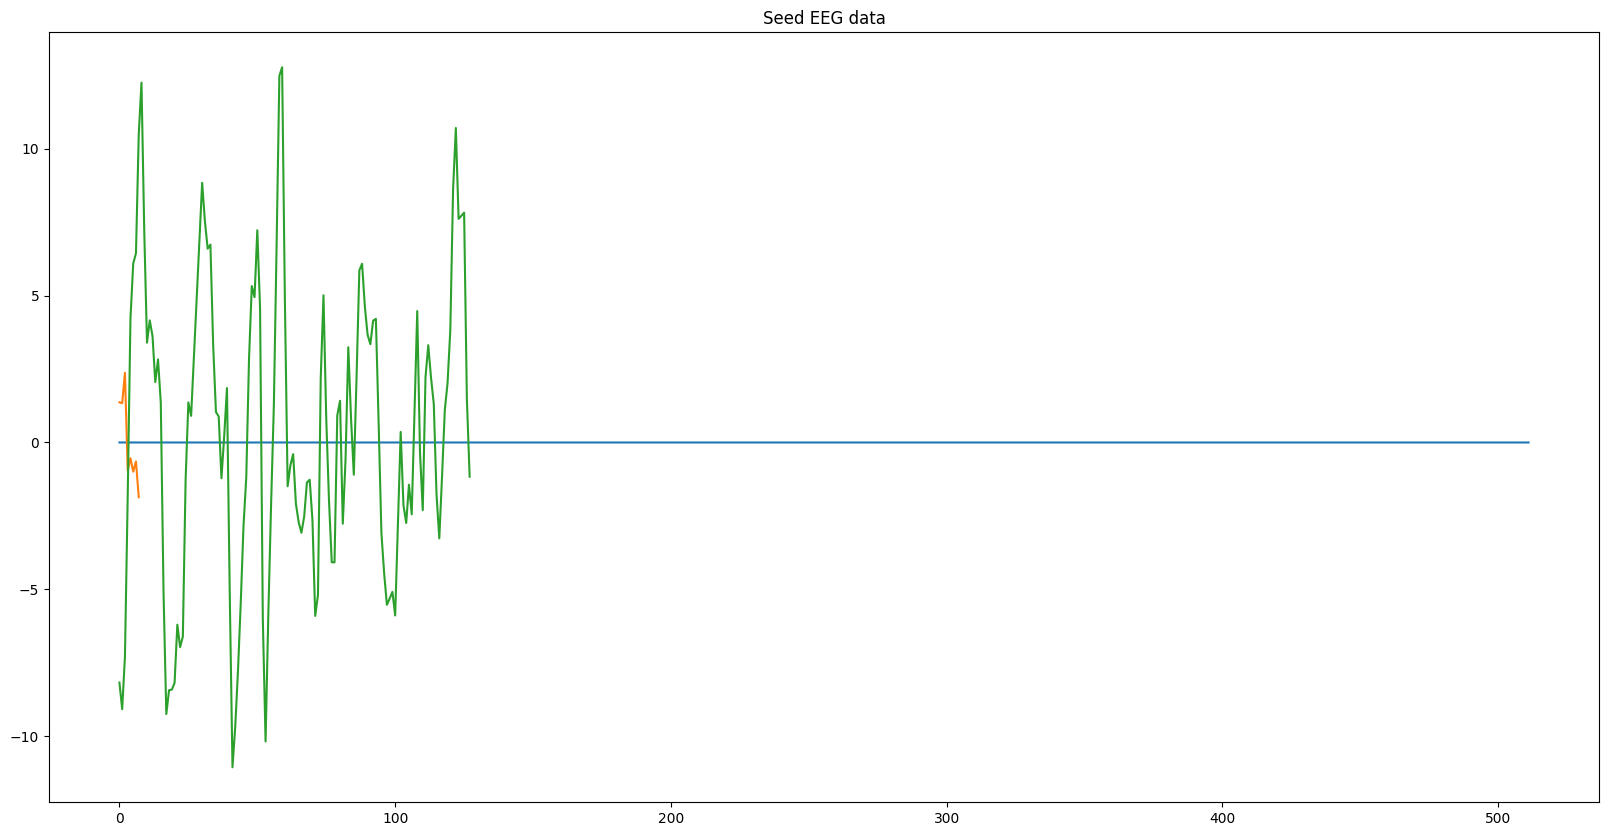

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(seed_eegs[0, 0, :])
plt.plot(uva_eegs[0, 7, :])
plt.plot(deap_eegs[0, 7, :])
plt.title('Seed EEG data')
plt.show()

In [14]:
import h5py
import numpy as np
import pandas as pd

# Function to read datasets from an HDF5 file and flatten the data
def read_and_flatten_h5_data(file_path, signals_key='signals', labels_key=None):
    # with h5py.File(file_path, 'r') as file:
    #     signals = np.array(file.get(signals_key))
        # Flatten each sample so that each row in DataFrame is one sample
    signals_flattened = file_path.reshape(file_path.shape[0], -1)
    return signals_flattened

# Read and flatten data from the SEED dataset
print(seed_eegs.shape)
seed_signals = read_and_flatten_h5_data(seed_eegs.transpose(1,0,2), 'data')

# Read and flatten data from the DEAP dataset
#deap_signals = read_and_flatten_h5_data(tuh_eegs, 'features')

print(seed_signals.shape)
print(tuh_eegs.shape)
# Join the SEED and DEAP datasets
signals = np.concatenate((seed_signals, tuh_eegs), axis=0)
# labels = np.concatenate((seed_labels, deap_labels))
# Reshape the signals to 3D
signals = signals.reshape(-1, 8,512)

#Create a h5 file to store the combined dataset
combined_data_file = os.path.join(os.getcwd(), 'pretrain-data.h5')
with h5py.File(combined_data_file, 'w') as file:
    file.create_dataset('signals', data=signals)
    # file.create_dataset('labels', data=labels)


(8, 41229, 512)
(41229, 4096)
(74051, 4096)


In [15]:
deap_eegs_mm = min_max_normalization(deap_eegs[1].transpose(1,0))
# seed_eegs_mm = min_max_normalization(seed_eegs)
# uva_eegs_mm = min_max_normalization(uva_eegs)

Text(0.5, 1.0, 'Seed EEG data')

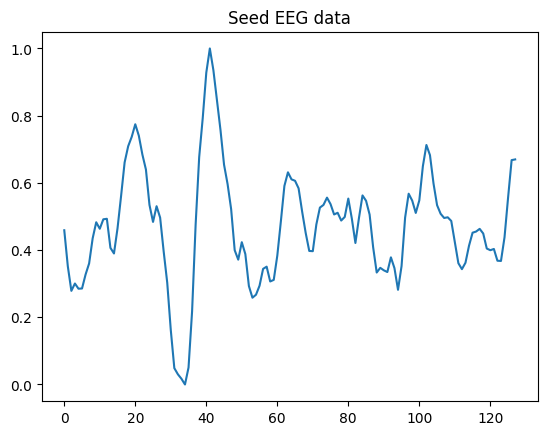

In [16]:
# # Plot
# plt.figure(figsize=(20, 10))
# plt.plot(seed_eegs_mm[0, 0, :])
# plt.plot(uva_eegs_mm[0, 7, :])
plt.plot(deap_eegs_mm[:, 0])
plt.title('Seed EEG data')

In [17]:
# read the .set file
import mne
import os


set_file = os.path.join(os.getcwd(), 'sub-mit003_task-Emotion_eeg.set')
raw = mne.io.read_raw_eeglab(set_file, preload=True)
raw.info

FileNotFoundError: input_fname does not exist: "/home/brgonzalez/Escritorio/GENIUS/EEG_DATA/data/sub-mit003_task-Emotion_eeg.set"